In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Ejericio 4

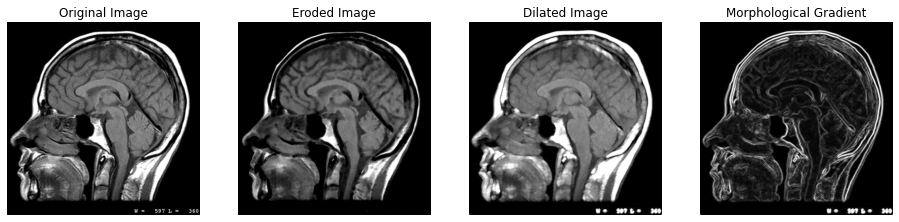

In [2]:
def apply_morphological_operation_and_show(image, element_type, kernel_size):
    if element_type == 'disk':
        element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)
    elif element_type == 'square':
        element = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    elif element_type == 'rectangle':
        element = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    elif element_type == 'octagon':
        element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)
    elif element_type == 'diamond':
        element = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    elif element_type == 'star':
        element = cv2.getStructuringElement(cv2.MORPH_CROSS, kernel_size)
    else:
        raise ValueError("Tipo de elemento estructurante no válido")

    dilated_image = cv2.dilate(image, element)
    eroded_image = cv2.erode(image, element)
    morphological_gradient = cv2.subtract(dilated_image, eroded_image)

   
    plt.figure(figsize=(20, 10))

    plt.subplot(1, 5, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 5, 2)
    plt.imshow(eroded_image, cmap='gray')
    plt.title('Eroded Image')
    plt.axis('off')

    plt.subplot(1, 5, 3)
    plt.imshow(dilated_image, cmap='gray')
    plt.title('Dilated Image')
    plt.axis('off')

    plt.subplot(1, 5, 4)
    plt.imshow(morphological_gradient, cmap='gray')
    plt.title('Morphological Gradient')
    plt.axis('off')

    plt.show()


image = cv2.imread('brain-scan.jpeg', cv2.IMREAD_GRAYSCALE)


element_type = 'star'  
kernel_size = (5, 5)

apply_morphological_operation_and_show(image, element_type, kernel_size)


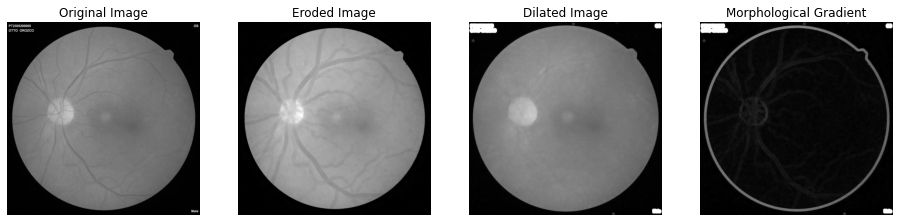

In [3]:
image = cv2.imread('ojo_ia.jpg', cv2.IMREAD_GRAYSCALE)


element_type = 'octagon'  
kernel_size = (15, 15)

apply_morphological_operation_and_show(image, element_type, kernel_size)

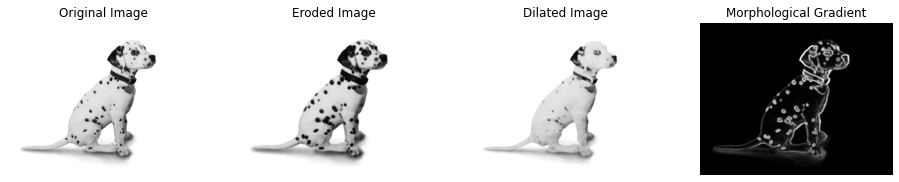

In [4]:
image = cv2.imread('perro.jpg', cv2.IMREAD_GRAYSCALE)


element_type = 'octagon'  
kernel_size = (5, 5)

apply_morphological_operation_and_show(image, element_type, kernel_size)

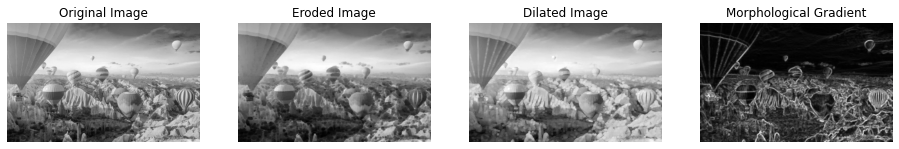

In [5]:
image = cv2.imread('turquia.jpg', cv2.IMREAD_GRAYSCALE)


element_type = 'disk'  
kernel_size = (5, 5)

apply_morphological_operation_and_show(image, element_type, kernel_size)


En las imágenes obtenidas se observa que el gradiente morfológico resalta los bordes y las transiciones de intensidad de manera efectiva. Este efecto se logra al aplicar una dilatación y una erosión a la imagen original, seguido de la substracción de la imagen erosionada de la dilatada. Como resultado, los bordes entre objetos y las regiones con cambios bruscos de intensidad se vuelven más prominentes. El término "gradiente" se refiere a la magnitud y dirección del cambio de intensidad en la imagen, y el gradiente morfológico lo muestra claramente al resaltar estas transiciones. 

## Ejercicio 5

In [6]:
imagen = cv2.imread('rice.jpg', cv2.IMREAD_GRAYSCALE)

image.shape

(369, 598)

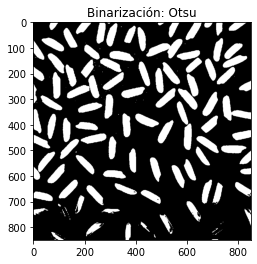

In [7]:
def binarizar_imagen(imagen, metodo_binarizacion):
    if metodo_binarizacion == 'Otsu':
        _, binarizada = cv2.threshold(imagen, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    elif metodo_binarizacion == 'Adaptativa':
        binarizada = cv2.adaptiveThreshold(imagen, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    elif metodo_binarizacion == 'Adaptativa Otsu':
        _, adaptativa_binarizada = cv2.threshold(cv2.adaptiveThreshold(imagen, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    elif metodo_binarizacion == 'Media':
        _, binarizada = cv2.threshold(imagen, np.mean(imagen), 255, cv2.THRESH_BINARY)
    else:
        raise ValueError("Método de binarización no válido")

    return binarizada

# Cargar la imagen en escala de grises
imagen = cv2.imread('rice.jpg', cv2.IMREAD_GRAYSCALE)

#"Otsu / Adaptativa / Adaptativa Otsu / Media"

# Solicitar al usuario el tipo de binarización
tipo_binarizacion = "Otsu"

# Binarizar la imagen
imagen_otsu = binarizar_imagen(imagen, tipo_binarizacion)

# Mostrar la imagen binarizada
plt.imshow(imagen_otsu, cmap='gray')
plt.title('Binarización: ' + tipo_binarizacion)
plt.show()


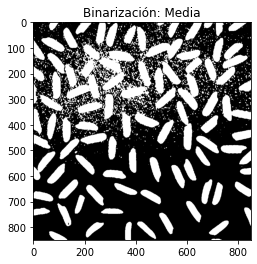

In [8]:
# Solicitar al usuario el tipo de binarización
tipo_binarizacion = "Media"

# Binarizar la imagen
imagen_media = binarizar_imagen(imagen, tipo_binarizacion)

# Mostrar la imagen binarizada
plt.imshow(imagen_media, cmap='gray')
plt.title('Binarización: ' + tipo_binarizacion)
plt.show()

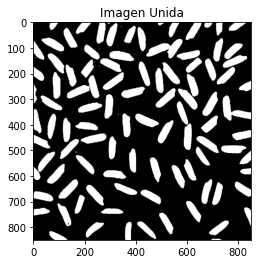

In [9]:
# Cortar la imagen binarizada de Otsu de 0 a 600 pixeles en forma vertical
imagen_otsu_recortada = imagen_otsu[:600, :]

# Obtener la parte restante de la imagen binarizada de la media
imagen_media_resto = imagen_media[600:, :]

# Unir las dos partes de las imágenes
imagen_unida = np.vstack((imagen_otsu_recortada, imagen_media_resto))

# Mostrar la imagen unida
plt.imshow(imagen_unida, cmap='gray')
plt.title('Imagen Unida')
plt.show()

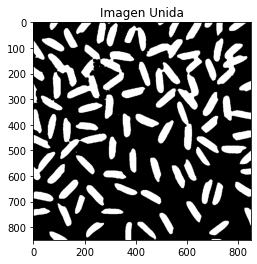

Número de granos de arroz: 95


In [10]:
#aplicar operaciones morfologicas para eliminar ruido de la imagen 

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
binarizada = cv2.morphologyEx(imagen_unida, cv2.MORPH_CLOSE, kernel)

# Mostrar la imagen unida
plt.imshow(binarizada, cmap='gray')
plt.title('Imagen Unida')
plt.show()

num_componentes, etiquetas, estadisticas, centroides = cv2.connectedComponentsWithStats(binarizada, connectivity=8)

# El número de componentes conectadas es el número de granos de arroz, excluyendo el fondo
num_granos_arroz = num_componentes - 1  # Restar 1 para excluir el fondo

print("Número de granos de arroz:", num_granos_arroz)